In [2]:
# if you have preformatted data, you can read in that data faster using libraries 
# without having to readlines, split, etc.

import numpy

# help function gives you a list of parameters
help(numpy.genfromtxt)

# print starts with:
# genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
# some of the parameters have defaults, which is shown by the presence of "=" 
# so dtype parameter default is float, delimiter default is None
# first parameter here, fname, is required
# skip_header is helpful to skip any rows that have info you don't want
# Note that instructor emphasized the skip headers as a parameter on purpose, as it would be important for the homework


Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
        in a 

In [3]:
import os.path

In [6]:
distance_file = os.path.join('data', 'distance_data_headers.csv')
# parameters: file name, delimiter as ',', and dtype as unicode as the .csv file is a mix of datatypes and this will bring it in as strings 
distances = numpy.genfromtxt(fname = distance_file, delimiter = ',', dtype = 'unicode')
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [8]:
# we want to seperate the headers as strings and the data as float
# this is a numpy array

# get headers by slicing the array using indexing:
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [9]:
type(headers)

numpy.ndarray

In [13]:
# now isolate the data from the numpy array (everything but the header) by slicing
data = distances[1:]

# we can also slice columns: data = distances[1:, 0:3] would show 1st 3 columns

print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [36]:
# consider sketching the table for the students to refer to as you walk through this

In [18]:
# changing data in numpy array requires a specific numpy function .astype() with parameter numpy.float
# note here that we are re-writing the variable data with the new datatype. 
# warn students to consider carefully when to overwrite versus save as new variables

data = data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [21]:
# slice out 1st row only
data[0]

# length of 1st row
len(data[0])

5

In [29]:
# if we want to access a column within the qst row, we can do it two ways:
y = data[0][3]
print(y) # prints 11.5478

z = data[0, 3]
print(z) # also prints 11.5478


11.5478
11.5478


In [23]:
# Slice out all rows, but only 1st column
x = data[:, 0]
print(x)

[1.000e+00 2.000e+00 3.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]


In [32]:
# to make a subset of data with some row and some columns
# general syntax: new_variable = data[rowstart: rowend, columnstart: columnend]

small_data = data[0:10, 0:4]
print(small_data)

[[ 1.      8.9542  5.8024 11.5478]
 [ 2.      8.6181  6.0942 13.9594]
 [ 3.      9.0066  6.0637 13.0924]
 [ 4.      9.2002  6.0227 14.5282]
 [ 5.      9.1294  5.9365 13.5321]
 [ 6.      9.0462  6.2553 13.906 ]
 [ 7.      8.8657  5.9186 12.9312]
 [ 8.      9.3256  6.2351 13.0721]
 [ 9.      9.4184  6.1993 13.2614]
 [10.      9.06    6.0478 13.4953]]


In [31]:
# slicing options:
# : only means grab everything
# 0 means only the 1st thing
# order matters...  list rows first and then columns

small_data2 = data[:, 0] # all rows, only 1st column

In [35]:
# working with the data, calculating the average

# basic syntax data_average = numpy.mean(data_set)

thr4_atp = data[:,1] # all rows, 2nd column
print(thr4_atp)

[8.9542 8.6181 9.0066 ... 8.6625 9.2456 8.8135]


In [38]:
# average of one column that you've sliced and saved as variable thr4_atp
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [40]:
# average each column individually by creating a for loop
# how many columns?

num_columns = len(data[0]) # extract a row to count columns, but it could be any row
print(num_columns)

5


In [47]:
for i in range(1, num_columns):
    column = data[:, i]
    avg_col = numpy.mean(column)
    #print(avg_col)
    print(f'The average distance for {headers[i]} is {avg_col: .3f}')

The average distance for THR4_ATP is  10.877
The average distance for THR4_ASP is  7.342
The average distance for TYR6_ATP is  11.210
The average distance for TYR6_ASP is  10.993


## Making graphs from this data

In [48]:
# graphing is often the first thing on the second day, so could start with a review of the previous lesson

import matplotlib.pyplot

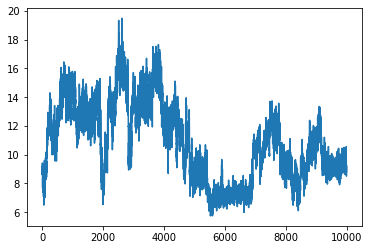

In [50]:
# initialize a new graph
matplotlib.pyplot.figure()

matplotlib.pyplot.plot(data[:, 1])

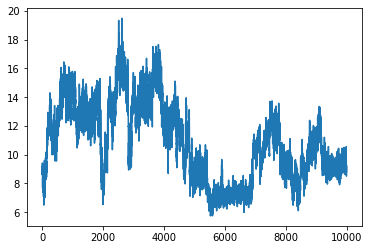

In [53]:
# can use aliasing to shorten what we are typing here
# general syntax for alising is import library.module as yourname
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data[:, 1])


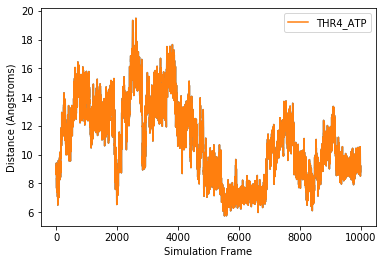

In [58]:
# add axis titles

sample = headers[1] # use same # as the column to pull the proper name 

plt.figure()
plt.plot(data[:,1])
plt.xlabel('Simulation Frame') 
plt.ylabel('Distance (Angstroms)')
fig_1 = plt.plot(data[:,1], label = sample)
plt.legend()
plt.savefig(f'{sample}.png', dpi = 300)
# file will be saved in the same directory
# can set the resolution with dpi

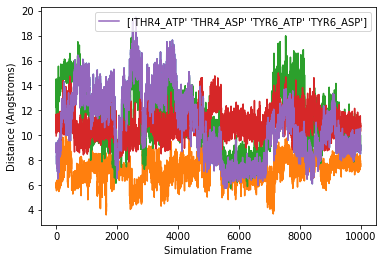

In [59]:
# make 2 plots
samples = headers[1:]

plt.figure()
plt.plot(data[:,1:])
plt.xlabel('Simulation Frame') 
plt.ylabel('Distance (Angstroms)')
fig_1 = plt.plot(data[:,1], label = samples)
plt.legend()
plt.savefig(f'all_residues.png', dpi = 300)



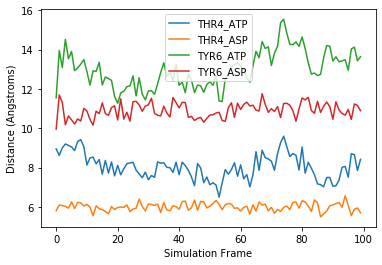

In [66]:
# make 2 plots
samples = headers[1:]

plt.figure()
plt.xlabel('Simulation Frame') 
plt.ylabel('Distance (Angstroms)')
plt.savefig(f'all_residues.png', dpi = 300)

# use for loop with range function. Range of 1 to length of column.
# starting at 1 because we don't want to graph the first column which is the index
# here just plotting first 100 data points
for col in range(1, len(data[0])):
    plt.plot(data[:100, col], label=headers[col])
    plt.savefig(f'{headers[col]}.png')

plt.legend()


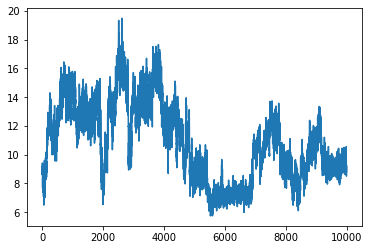

In [67]:
# In the cases above, we are declaring only the y value and its plotting in order for x
# what if you need to plot specific values for x and y?

plt.figure()
# plt.plot(data[x,y]) declare x first and then y
plt.plot(data[:,0], data[:, 1]) # slicing data to get all rows/1st column which is the index, then y is all rows, 2nd column


In [68]:
# general syntax print(data[rowstart:rowstop:rowincrement_option, columnstart:columnstop:columnincrement_option])
print(data[0:10:2, :])

[[ 1.      8.9542  5.8024 11.5478  9.9557]
 [ 3.      9.0066  6.0637 13.0924 11.3043]
 [ 5.      9.1294  5.9365 13.5321 10.6279]
 [ 7.      8.8657  5.9186 12.9312 10.2176]
 [ 9.      9.4184  6.1993 13.2614 10.366 ]]


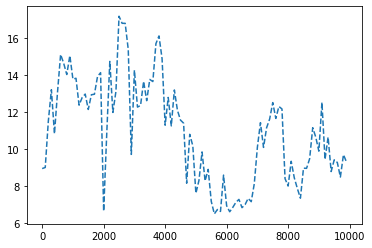

In [69]:
# 0::100 means all rows, but only every 100 data points (same for columns)
plt.plot(data[0::100, 0], data[0::100,1], '--')

# check out other options in the documentation

At the end of lesson 4, there is a Geometry analysis project and three additional project extensions (optional)
There is an xyz file for water
Used to convey molecular structures
1st line is # of atoms
2nd line is comment line (name of molecule)
3rd line on is the symbol, x, y, z coordinate
there will be as many lines as there are atoms in the file

We should write a code to read in infomation into 

Distance formula from geometry 